<a href="https://colab.research.google.com/github/IrfanKhalid/ForexExchangePrediction/blob/master/ForexExchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install necessary Packages

!pip install mpl_finance

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter , WeekdayLocator,DayLocator,MONDAY


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm

import mpl_finance

import warnings
warnings.filterwarnings("ignore")


In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
!ls drive/'My Drive'

In [0]:
#Load Data
Forex=pd.read_csv("drive/My Drive/Forex_AUDUSD1440.csv")

In [64]:
#Exploratory Analysis: It has five columns, We added two more current open and current close'(predict)' in order to
#improve Algorithm performace
Forex.head()

,Time,Open,High,Low,Close,Volume,currentopen,currentclose(predict)
0,2012.12.10,1.04865,1.05049,1.04643,1.04868,59083,1.04870,1.05266
1,2012.12.11,1.04870,1.05315,1.04602,1.05266,61555,1.05265,1.05531
2,2012.12.12,1.05265,1.05848,1.05219,1.05531,68021,1.05522,1.05264
3,2012.12.13,1.05522,1.05628,1.05072,1.05264,66515,1.05261,1.05651
4,2012.12.14,1.05261,1.05770,1.05090,1.05651,68063,1.05507,1.05499


In [18]:
#It does contain any null values
print("Forex Dimensions",Forex.shape,"\n")
Forex.describe()

Forex Dimensions (1535, 8) 



,Open,High,Low,Close,Volume,currentopen,currentclose(predict)
count,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,0.817875,0.821722,0.813978,0.817702,68223.367427,0.817662,0.817488
std,0.097278,0.097181,0.096970,0.097114,21369.698016,0.097130,0.096967
min,0.683970,0.692450,0.682640,0.685990,13722.000000,0.683970,0.685990
25%,0.746865,0.750730,0.743540,0.746905,55817.000000,0.746840,0.746860
50%,0.773180,0.777080,0.768930,0.772860,66859.000000,0.772860,0.772830
75%,0.903165,0.907155,0.898840,0.902925,78607.500000,0.902960,0.902790
max,1.059590,1.059710,1.053110,1.059610,161462.000000,1.059590,1.059610


In [14]:
#All the values except Volume and Time are floating points upto 5 decimals.
Forex.dtypes

Time                      object
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                     int64
currentopen              float64
currentclose(predict)    float64
dtype: object

Text(0.5,1,'Forex Rate of AUD/USD with Time')

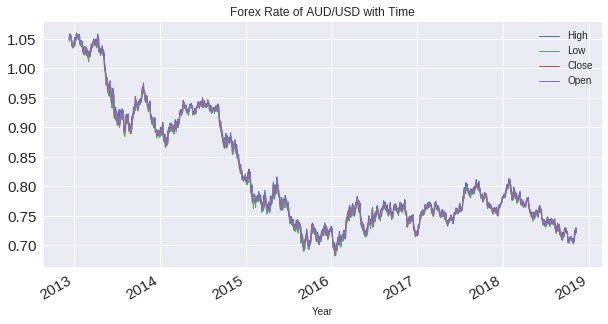

In [65]:
#Visualization to understand the data distribution 

ForexT=Forex[['High','Low','Close','Open','Time']]
ForexT.Time = pd.to_datetime(ForexT.Time)
ForexT.set_index('Time', inplace=True)
ForexT.plot(figsize=(10,5), linewidth=1, fontsize=15)
plt.xlabel('Year', fontsize=10);
plt.title('Forex Rate of AUD/USD with Time')

In [0]:
# Data Engineering, Random Foresr can't handle float so we will convert all attributes into int
Forex.Open=(Forex.Open*100000).astype(int)
Forex.Close=(Forex.Close*100000).astype(int)
Forex.High=(Forex.High*100000).astype(int)
Forex.Low=(Forex.Low*100000).astype(int)
Forex.currentopen=(Forex.currentopen*100000).astype(int)
Forex['currentclose(predict)']=(Forex['currentclose(predict)'] *100000).astype(int)


In [0]:
# Create New Attribute for classification task 'Profit', if curreny will close more than opening, than we will have profit, otherwise we will have lost

Forex['Prdeict']=Forex['currentclose(predict)']-Forex['currentopen']
Forex['Prdeict']=Forex['Prdeict'].apply(lambda x: 1 if x > 0 else 0)


In [98]:
#Split data into train and test

ForexTrain=Forex[['Open','High','Low','Close','Volume','currentopen']] 
ForexTest=Forex['Prdeict']
X_train, X_test,Y_train, Y_test = train_test_split(ForexTrain, ForexTest, test_size = 0.10, random_state = 0)
print (ForexTrain.shape , X_train.shape , X_test.shape , Y_train.shape , Y_test.shape )

(1535, 6) (1381, 6) (154, 6) (1381,) (154,)


In [118]:
# Random Forest Classifier

Model = RandomForestClassifier(n_estimators=30,max_depth=10)
Model.fit( X_train , Y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
print ("Random Forest \nTraining Score:",Model.score( X_train , Y_train ),"\nTest Score:    " , Model.score( X_test , Y_test ))


Random Forest 
Training Score: 0.8580738595220855 
Test Score:     0.5454545454545454


In [140]:
model = svm.LinearSVC(max_iter=95,multi_class='crammer_singer')
model.fit(X_train , Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=95,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [141]:
print ("Suport Vector Machine \n Training Score:",model.score( X_train , Y_train ),"\n Test Score" , model.score( X_test , Y_test ))


Suport Vector Machine 
 Training Score: 0.501810282404055 
 Test Score 0.525974025974026


Text(0.5,1,'Forex Rate of AUD/USD with Time')

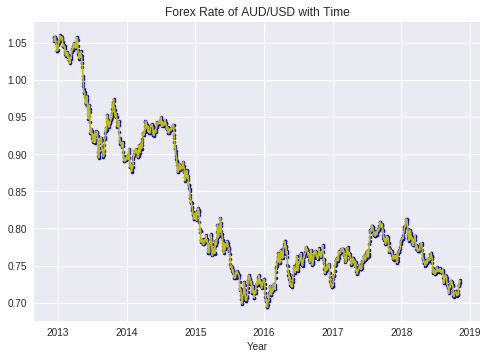

In [80]:
# Simple Moving Average 

Long_rolling=Forex.rolling(window=200).mean()
Long_rolling=short_rolling[['High']]
plt.plot(Long_rolling,'.b')

short_rolling = Forex.rolling(window=2).mean()
short_rolling=short_rolling[['High']]
plt.plot(short_rolling,'-y',)

plt.xlabel('Year', fontsize=10);
plt.title('Forex Rate of AUD/USD with Time')


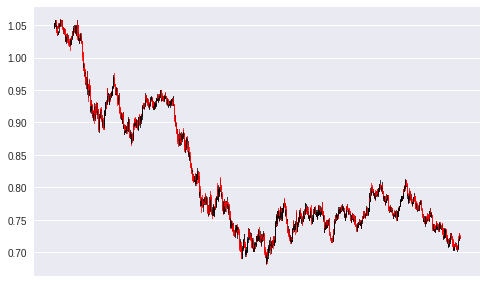

In [92]:
#Candle Stick for high,low,open and close

def candlestick_plot(dat , stick = 'day' , otherseries = None):
    years = []
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    temp_data = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = temp_data
            stick = 1 # Used for plotting
        

    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)

    #if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days') :
    weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    #else:
    #weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    mpl_finance.candlestick2_ohlc(ax, plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist(),
                      colorup = "black", colordown = "red", width = stick * 0.5)
 
    # Plot other series as lines
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')    
    plt.show()
 
candlestick_plot(Forex)